<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/diabetes.png?raw=true" width=800 align="left"/>

# 실습 내용

- K-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [45]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [46]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [47]:
# 데이터 살펴보기
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**데이터설명**

- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수(체중(kg)/키(m))^2
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0 또는 1)

In [48]:
# 기술통계 확인
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [49]:
# Target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [50]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**3) 정규화**

- KNN 알고리즘을 사용하기 위해 정규화를 진행합니다.

In [51]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [52]:
# y_train에 transform

# 4.성능 예측

- K분할 교차 검증 방법으로 모델 성능을 예측합니다.
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용합니다.
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정합니다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환합니다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있습니다.


**1) Decision Tree**

In [53]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeClassifier(random_state=1) # max_depth=5,  

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10) #★

# 확인
print(cv_score) # 정확도 / 회귀면 r2
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

# 예측결과 저장
result = {}
result['Decision Tree'] = cv_score.mean()
result

[0.66666667 0.72222222 0.74074074 0.53703704 0.74074074 0.7037037
 0.7037037  0.75471698 0.73584906 0.60377358]
평균: 0.6909154437456324
표준편차: 0.06649981244021673


{'Decision Tree': 0.6909154437456324}

In [54]:
#정규화는 knn 알고리즘 때문에함

**2) KNN**

In [55]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# 선언하기
model = KNeighborsClassifier()

# 검증하기
cv_score = cross_val_score(model, x_train_s, y_train, cv=10)

# 확인
print(cv_score)
print(cv_score.mean())

# 예측 결과 저장
result['KNN'] = cv_score.mean()
result

[0.64814815 0.68518519 0.72222222 0.64814815 0.72222222 0.74074074
 0.68518519 0.66037736 0.77358491 0.60377358]
0.6889587700908455


{'Decision Tree': 0.6909154437456324, 'KNN': 0.6889587700908455}

**3) Logistic Regression**

- LogisticRegression 사용시 발생하는 Warning을 없애려면 충분한 max_iter를 지정합니다.

In [56]:
# 불러오기
from sklearn.linear_model import LogisticRegression

# 선언하기
model_lr = LogisticRegression()

# 검증하기 # 피팅전★ 성능향상위한 방법이 아니고 성능예측만 해보는것
# 튜닝대상 선정위함
cv_score = cross_val_score(model, x_train_s, y_train, cv=10)

# 확인
print(cv_score)
print(cv_score.mean())

# 예측 결과 저장
result['Logistic Regression'] = cv_score.mean()
result


[0.64814815 0.68518519 0.72222222 0.64814815 0.72222222 0.74074074
 0.68518519 0.66037736 0.77358491 0.60377358]
0.6889587700908455


{'Decision Tree': 0.6909154437456324,
 'KNN': 0.6889587700908455,
 'Logistic Regression': 0.6889587700908455}

**4) 성능 시각화 비교**

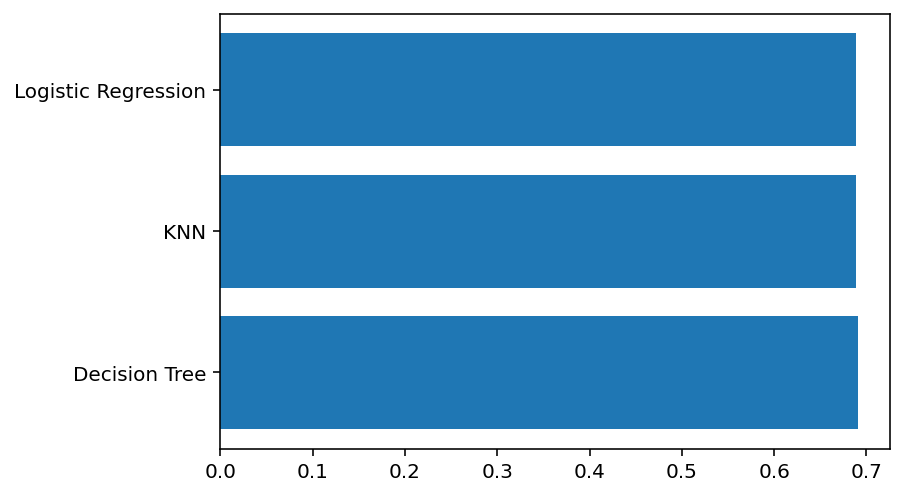

In [57]:
# plt.barh(y=list(result.keys()), width=result.values()) #
plt.barh(y=list(result), width=result.values()) # 딕셔너리 전달하면 키 반환
plt.show()

In [58]:
list(result)

['Decision Tree', 'KNN', 'Logistic Regression']

In [59]:
result.keys()

dict_keys(['Decision Tree', 'KNN', 'Logistic Regression'])

<BarContainer object of 3 artists>

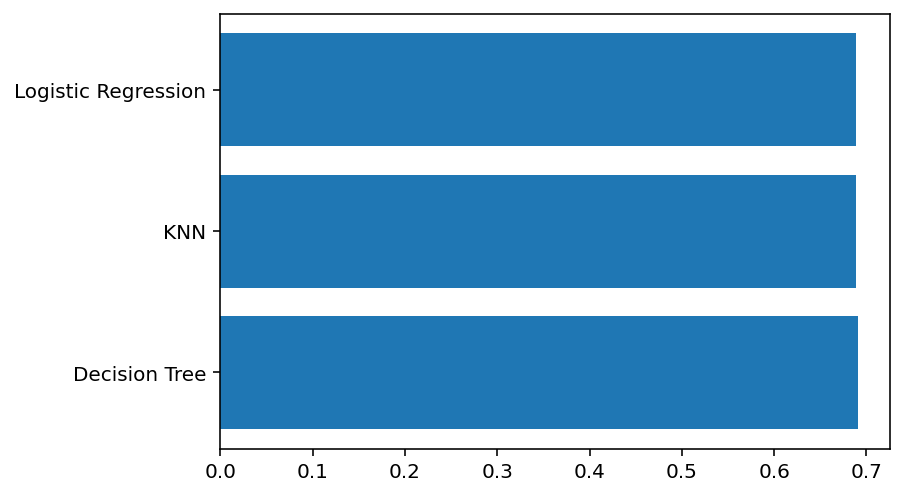

In [60]:
plt.barh(y=list(result.keys()), width=result.values())

# 성능평가 

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
# 모델선언
model = LogisticRegression()

# 학습
model.fit(x_train, y_train)

# 에측
y_pred = model.predict(x_test)

# 평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[132  14]
 [ 36  49]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

